In [ ]:
!pip install pytesseract
!sudo apt install tesseract-ocr

Reading package lists... Done
Building dependency tree       
Reading state information... Done
tesseract-ocr is already the newest version (4.00~git2288-10f4998a-2).
0 upgraded, 0 newly installed, 0 to remove and 11 not upgraded.


In [ ]:
import cv2
import pytesseract
import matplotlib.pyplot as plt
from IPython.display import Image
from pylab import rcParams
import numpy as np
from pprint import pprint
from pytesseract import Output

In [ ]:
rcParams['figure.figsize']=8, 16

In [ ]:
file_name="/content/invoice-sample.JPG"

In [ ]:
img=cv2.imread(file_name)

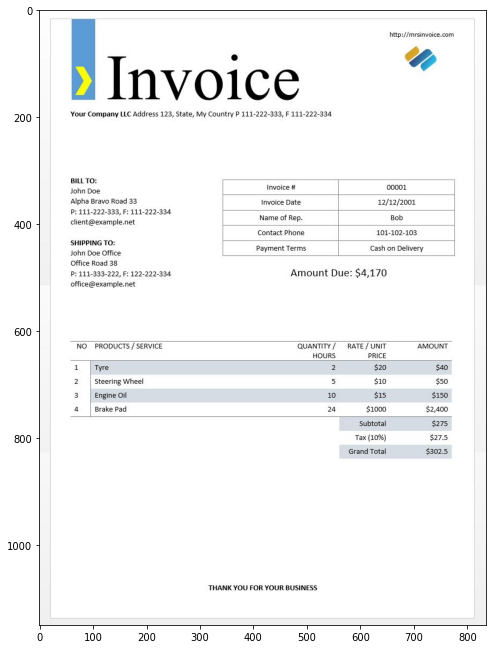

In [ ]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))


In [ ]:
try:
    from PIL import Image
except ImportError:
    import Image
import pytesseract

In [ ]:
print(pytesseract.image_to_string(Image.open('/content/invoice-sample.JPG')))

’ Invoice

Your Company LLC Address 123, State, My Country P 111-222-333, F 111-222-334

BILL TO:
John Doe

‘Alpha Bravo Road 33

P: 111-222-333, F: 111-222-334
client@example.net

SHIPPING TO:
John Doe Office

Office Road 38,

P: 111-333-222, F: 122-222-834
office@example.net

http://mrsinvoice.com

 

 

 

 

 

Invoice # 00001
Invoice Date 12/12/2001
Name of Rep. Bob

Contact Phone 101-102-103

 

Payment Terms

 

 

Cash on Delivery

 

 

Amount Due: $4,170

 

 

 

 

NO PRODUCTS / SERVICE QUANTITY / RATE / UNIT AMOUNT
HOURS: PRICE

1 tye 2 $20 $40

2__| Steering Wheel 5 $10 $50

3 | Engine oil 10 $15 $150

4 | Brake Pad 24 $1000 $2,400

Subtotal $275

Tax (10%) $27.5

Grand Total $202.5

‘THANK YOU FOR YOUR BUSINESS



In [ ]:
d = pytesseract.image_to_data(img, output_type=Output.DICT)
print(d.keys())

dict_keys(['level', 'page_num', 'block_num', 'par_num', 'line_num', 'word_num', 'left', 'top', 'width', 'height', 'conf', 'text'])


-1

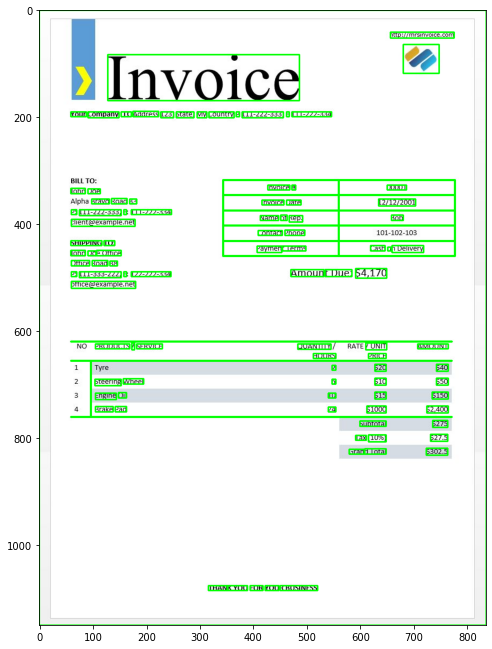

In [ ]:
n_boxes = len(d['text'])
for i in range(n_boxes):
    if int(d['conf'][i]) > 60:
        (x, y, w, h) = (d['left'][i], d['top'][i], d['width'][i], d['height'][i])
        img = cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
cv2.waitKey(0)

In [ ]:
file_name="/content/Capture d’écran (2).png"
img=cv2.imread(file_name)

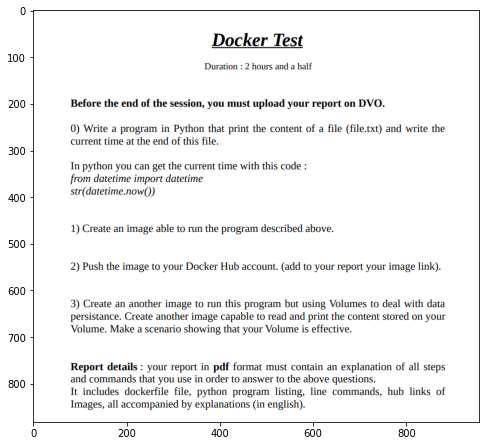

In [ ]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [ ]:
d = pytesseract.image_to_data(img, output_type=Output.DICT)
print(d.keys())

len(d["text"])
d["text"]

dict_keys(['level', 'page_num', 'block_num', 'par_num', 'line_num', 'word_num', 'left', 'top', 'width', 'height', 'conf', 'text'])


213

-1

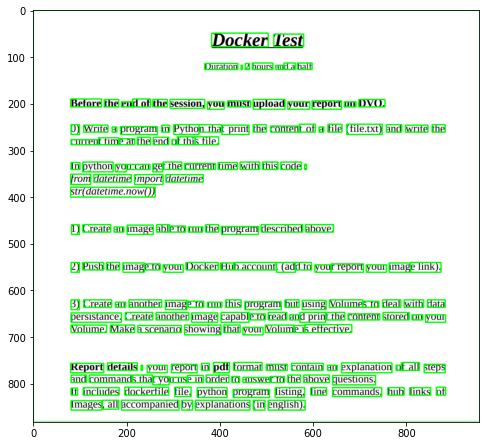

In [ ]:
n_boxes = len(d['text'])
for i in range(n_boxes):
    if int(d['conf'][i]) > 60:
        (x, y, w, h) = (d['left'][i], d['top'][i], d['width'][i], d['height'][i])
        img = cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
cv2.waitKey(0)

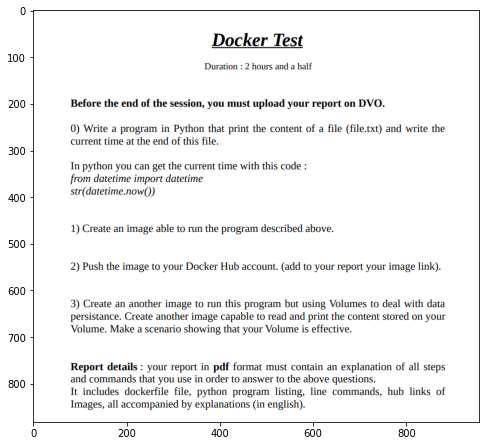

In [ ]:
img=cv2.imread(file_name)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

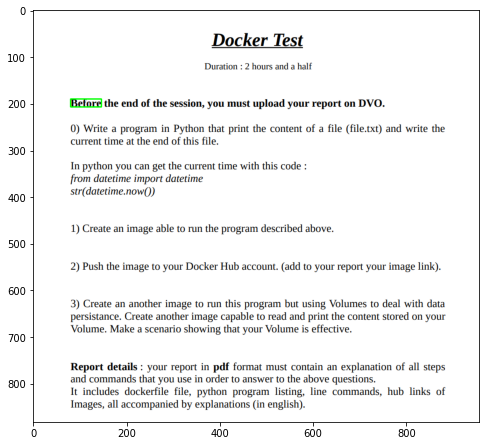

In [ ]:
pattern='^Before'
n_boxes = len(d['text'])
for i in range(n_boxes):
    if int(d['conf'][i]) > 60:
    	if re.match(pattern, d['text'][i]):
	        (x, y, w, h) = (d['left'][i], d['top'][i], d['width'][i], d['height'][i])
	        img = cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)
         
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))